# Driver Drowsiness Detection using CNN

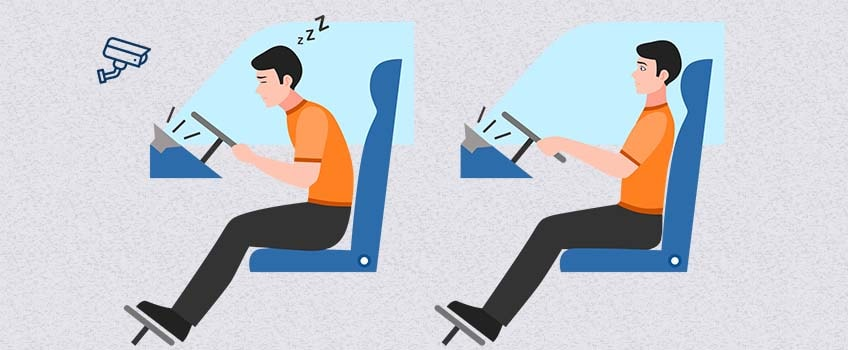

## Importing necessary libraries..

In [1]:
import numpy as np
import cv2
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import pandas as pd
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import imutils
import dlib

## Loading the dataset

## Loading the images and labels and Preprocessing the Dataset

Input Shape of Images for the CNN model - (32, 32, 3) <br>
Dataset os split into Train Set and Test Set with test set containing 20% of the total number of images<br>
Labels -> 
- 0 - Closed Eye<br>
- 1 - Open Eye

In [2]:
data = np.load('desktop/prooo/dataset_compressed.npz', allow_pickle=True)
X = data['arr_0']
Y = data['arr_1']

X = list(X)
Y = list(Y)
print(len(X))
print(len(Y))

1452
1452


In [4]:
X

[array([[[ 77,  78,  93],
         [ 76,  75,  91],
         [ 68,  68,  83],
         ...,
         [132, 115, 129],
         [134, 117, 131],
         [123, 106, 119]],
 
        [[ 82,  83,  97],
         [ 77,  75,  90],
         [ 80,  77,  90],
         ...,
         [ 96,  81,  94],
         [108,  91, 105],
         [117, 100, 114]],
 
        [[ 71,  72,  84],
         [ 72,  67,  79],
         [ 76,  69,  80],
         ...,
         [ 95,  82,  96],
         [102,  87, 103],
         [106,  90, 107]],
 
        ...,
 
        [[ 94,  93, 118],
         [ 94,  94, 120],
         [ 96,  95, 120],
         ...,
         [104, 105, 133],
         [103, 104, 132],
         [ 99,  99, 129]],
 
        [[ 97,  95, 122],
         [ 96,  95, 122],
         [ 93,  92, 118],
         ...,
         [105, 106, 134],
         [103, 104, 132],
         [100, 100, 130]],
 
        [[ 96,  92, 121],
         [ 98,  94, 124],
         [101,  98, 124],
         ...,
         [107, 108, 136],
  

In [5]:
Y

['Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',
 'Closed',

In [7]:
for i in range(len(X)):
    img = X[i]
    img = cv2.resize(img, (32, 32))
    X[i] = img
    
print(len(X))
print(X[0].shape)

1452
(32, 32, 3)


In [8]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(Y.shape)
print(Y[0])
print(set(Y))

(1452,)
0
{0, 1}


In [9]:
Y

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(1452, 32, 32, 3)
(1452,)


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1161, 32, 32, 3)
(1161,)
(291, 32, 32, 3)
(291,)
(1161, 32, 32, 3)
(1161, 2)
(291, 32, 32, 3)
(291, 2)


## Visualizing images of Closed Eye and Open Eye from the Dataset

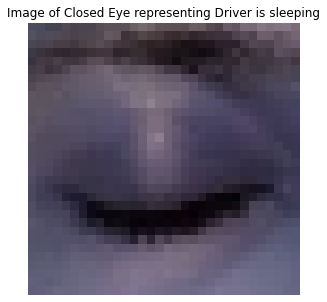

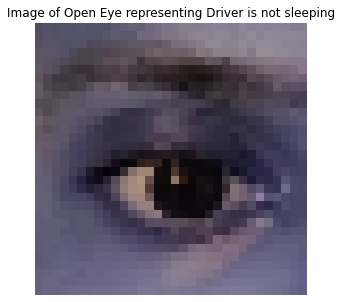

In [13]:
figure1 = plt.figure(figsize=(5, 5))
idx_closed = np.where(Y==0)
img_closed = X[idx_closed[0][0]]
plt.imshow(img_closed)
plt.title('Image of Closed Eye representing Driver is sleeping')
plt.axis('off')
plt.show()

figure2 = plt.figure(figsize=(5, 5))
idx_open = np.where(Y==1)
img_open = X[idx_open[0][0]]
plt.imshow(img_open)
plt.title('Image of Open Eye representing Driver is not sleeping')
plt.axis('off')
plt.show()

## Visualizing the Data Distribution in Train and Test Set

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


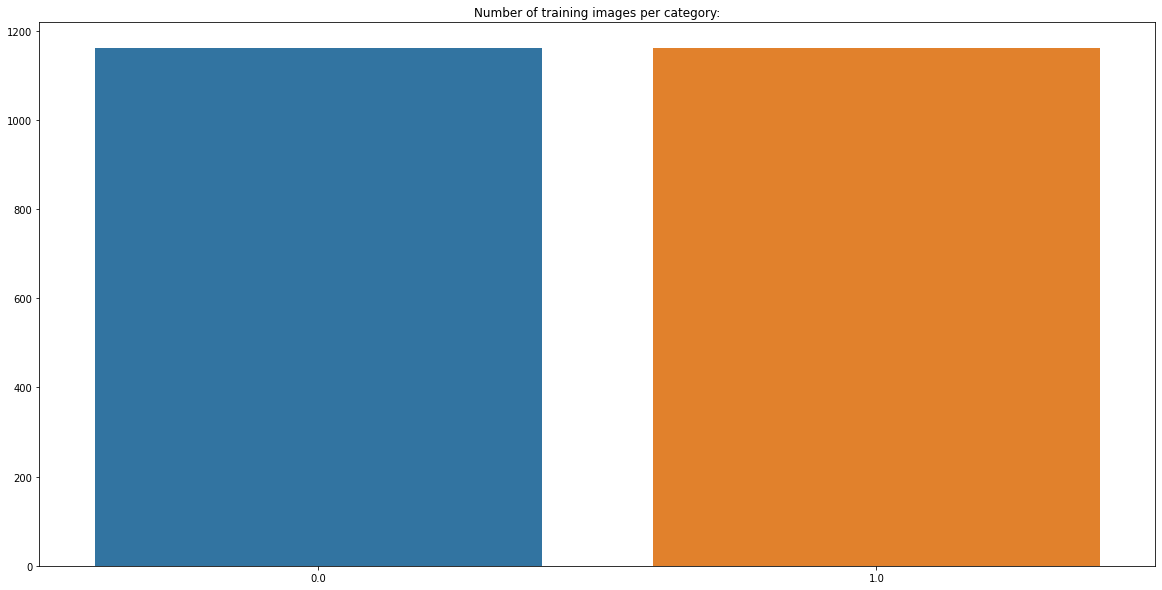

In [14]:
unique_train, count = np.unique(Y_train, return_counts=True)
plt.figure(figsize=(20, 10))
sns.barplot(unique_train, count).set_title("Number of training images per category:")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


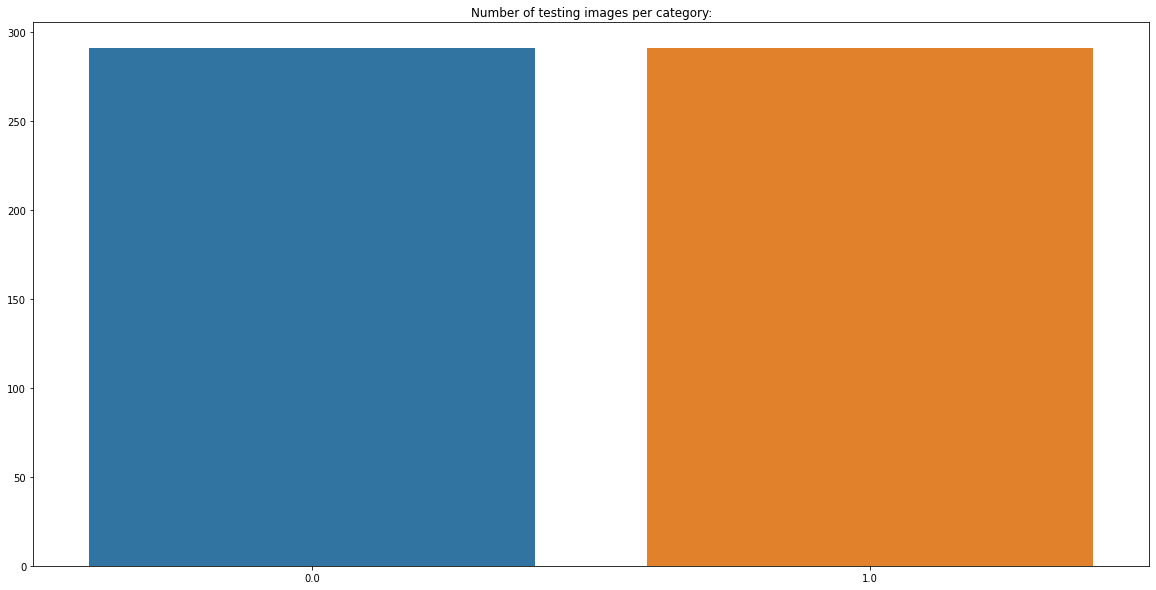

In [18]:
unique_test, count_test = np.unique(Y_test, return_counts=True)
plt.figure(figsize=(20, 10))
sns.barplot(unique_test, count_test).set_title("Number of testing images per category:")
plt.show()

#### The dataset is already balanced, as can be seen from the bar plots, hence there is no need to execute dataset balancing.

## Defining the Model Architecture

In [19]:
def driver_drowsiness_detection_model(input_shape=(32, 32, 3)):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv1', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv2', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv5', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv6', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), padding='same', strides=(1, 1), name='conv7', activation='relu', 
                     kernel_initializer=glorot_uniform(seed=0)))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(MaxPool2D((2, 2), strides=(2, 2)))
    
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc1'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu', kernel_initializer=glorot_uniform(seed=0), name='fc2'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax', kernel_initializer=glorot_uniform(seed=0), name='fc3'))
    
    optimizer = Adam(0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
model= driver_drowsiness_detection_model(input_shape=(32, 32, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 16, 16, 64)       

### Training the Model

Learning Rate - 0.0001<br>
Optimizer - Adam<br>
Number of Epochs - 60<br>
Batch Size = 128<br>

In [21]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2, horizontal_flip=True)
hist = model.fit(aug.flow(X_train, Y_train, batch_size=128), batch_size=128, epochs=60, validation_data=(X_test, Y_test))

Epoch 1/60
10/10 [==============================] - 4s 266ms/step - loss: 1.3141 - accuracy: 0.5306 - val_loss: 0.6935 - val_accuracy: 0.4914
Epoch 2/60
10/10 [==============================] - 2s 195ms/step - loss: 1.1557 - accuracy: 0.5297 - val_loss: 0.6914 - val_accuracy: 0.4948
Epoch 3/60
10/10 [==============================] - 2s 215ms/step - loss: 1.0203 - accuracy: 0.5581 - val_loss: 0.6720 - val_accuracy: 0.5189
Epoch 4/60
10/10 [==============================] - 2s 206ms/step - loss: 0.9185 - accuracy: 0.5788 - val_loss: 0.6398 - val_accuracy: 0.6048
Epoch 5/60
10/10 [==============================] - 2s 231ms/step - loss: 0.8973 - accuracy: 0.6072 - val_loss: 0.6217 - val_accuracy: 0.7045
Epoch 6/60
10/10 [==============================] - 2s 257ms/step - loss: 0.8858 - accuracy: 0.5891 - val_loss: 0.6142 - val_accuracy: 0.7526
Epoch 7/60
10/10 [==============================] - 2s 222ms/step - loss: 0.8229 - accuracy: 0.6141 - val_loss: 0.6079 - val_accuracy: 0.7835
Epoch 

## Plotting Loss Values and Accuracy against Number of Epochs for Train Set and Test Set

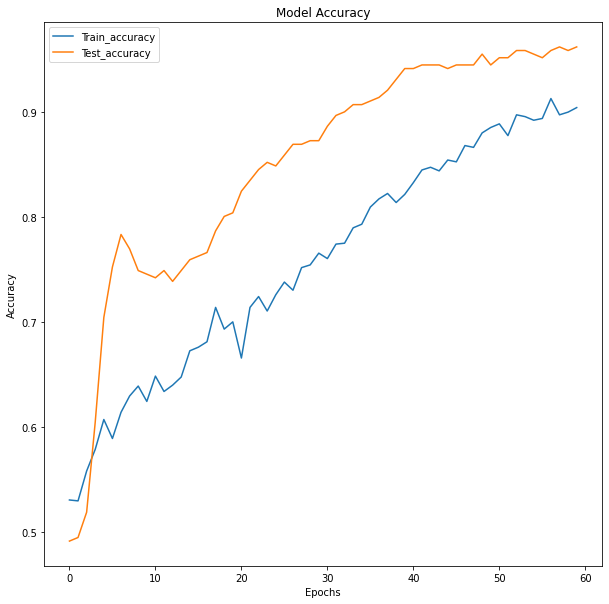

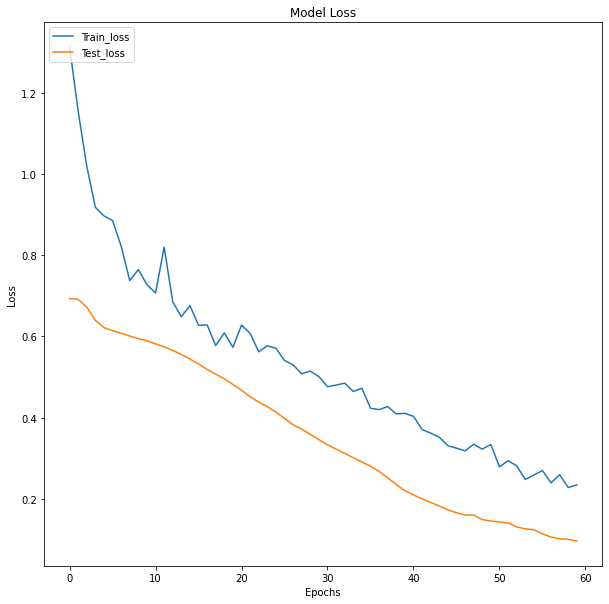

In [22]:
figure = plt.figure(figsize=(10, 10))
plt.plot(hist.history['accuracy'], label='Train_accuracy')
plt.plot(hist.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

## Evaluating Model on Test Set

In [23]:
pred = model.evaluate(X_test, Y_test)
print(f'Test Set Accuracy: {pred[1]}')
print(f'Test Set Loss: {pred[0]}')

10/10 [==============================] - 0s 33ms/step - loss: 0.0952 - accuracy: 0.9622
Test Set Accuracy: 0.962199330329895
Test Set Loss: 0.09521085768938065


## Classification Report

In [24]:
ypred = model.predict(X_test)
ypred = np.argmax(ypred, axis=1)
Y_test_pred = np.argmax(Y_test, axis=1)
print(classification_report(Y_test_pred, ypred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       148
           1       0.98      0.94      0.96       143

    accuracy                           0.96       291
   macro avg       0.96      0.96      0.96       291
weighted avg       0.96      0.96      0.96       291



## Confusion Matrix

<AxesSubplot:>

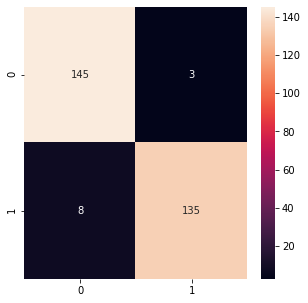

In [25]:
matrix = confusion_matrix(Y_test_pred, ypred)
df_cm = pd.DataFrame(matrix, index=[0, 1], columns=[0, 1])
figure = plt.figure(figsize=(5, 5))
sns.heatmap(df_cm, annot=True, fmt='d')

## Saving the Model

In [26]:
model.save('Driver_Drowsiness_Detection.h5')

## Testing Model on Images

### Testing the classification performnace on random images of Open and Closed Eyes

In [31]:
labels = ['Closed', 'Open']
img_closed1 = cv2.imread('desktop/prooo/closed_eye.jpg')
img_open1 = cv2.imread('desktop/prooo/open_eye.jpg')

img_closed1 = cv2.resize(img_closed1, (32, 32))
img_open1 = cv2.resize(img_open1, (32, 32))

img_closed1 = np.array(img_closed1)
img_open1 = np.array(img_open1)

img_closed1 = np.expand_dims(img_closed1, axis=0)
img_open1 = np.expand_dims(img_open1, axis=0)

In [33]:
ypred_closed1 = model.predict(img_closed1)
ypred_open1 = model.predict(img_open1)

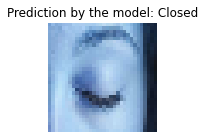

In [34]:
figure = plt.figure(figsize=(2, 2))
img_closed1 = np.squeeze(img_closed1, axis=0)
plt.imshow(img_closed1)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_closed1[0], axis=0)]}')
plt.show()

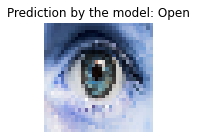

In [37]:
figure = plt.figure(figsize=(2, 2))
img_open1 = np.squeeze(img_open1, axis=0)
plt.imshow(img_open1)
plt.axis('off')
plt.title(f'Prediction by the model: {labels[np.argmax(ypred_open1[0], axis=0)]}')
plt.show()

## Creating Pipeline for making predictions on full face images

In [33]:
def full_face_detection_pipeline(input_image_path):
    face_cascade = cv2.CascadeClassifier('desktop/prooo/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('desktop/prooo/haarcascade_eye.xml')
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('desktop/prooo/shape_predictor_68_face_landmarks.dat')
    fa = FaceAligner(predictor, desiredFaceWidth=256)
    test_image = cv2.imread(input_image_path)
    test_image = imutils.resize(test_image, width=800)
    test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    rects = detector(test_image_gray, 2)
    for rect in rects:
        (x, y, w, h) = rect_to_bb(rect)
        faceOrig = imutils.resize(test_image[y:y+h, x:x+w], width=256)
        faceAligned = fa.align(test_image, test_image_gray, rect)
        faceAligned_gray = cv2.cvtColor(faceAligned, cv2.COLOR_BGR2GRAY)
        plt.imshow(faceAligned_gray)
        plt.axis('off')
        plt.title('Aligned Face')
        plt.show()
        eyes = eye_cascade.detectMultiScale(faceAligned_gray, 1.1, 4)
        predictions = []
        for (ex, ey, ew, eh) in eyes:
            eye = faceAligned[ey:ey+eh, ex:ex+ew]
#             cv2.rectangle(test_image, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 0, 255), 8)
            eye = cv2.resize(eye, (32, 32))
            eye = np.array(eye)
            eye = np.expand_dims(eye, axis=0)
            ypred = model.predict(eye)
            ypred = np.argmax(ypred[0], axis=0)
            predictions.append(ypred)
        if all(i==0 for i in predictions):
            cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 8)
            cv2.putText(test_image, 'Sleeping', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 3)
        else:
            cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 8)
            cv2.putText(test_image, 'Not Sleeping', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 3)
    output_path = 'desktop/prooo/test_image_prediction.jpg'
    cv2.imwrite(output_path, test_image) 
    return output_path

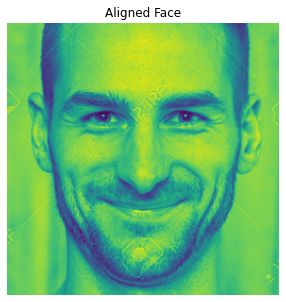

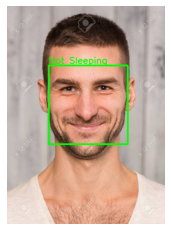

In [34]:
figure = plt.figure(figsize=(5, 5))
predicted_image = cv2.imread(full_face_detection_pipeline('desktop/prooo/active_person.jpg'))
predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)
plt.imshow(predicted_image)
plt.axis('off')
plt.show()

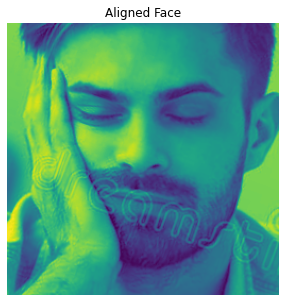

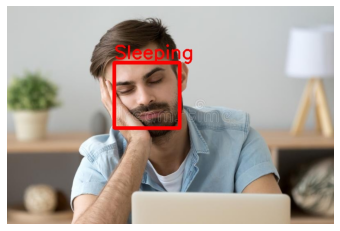

In [35]:
figure = plt.figure(figsize=(5, 5))
predicted_image = cv2.imread(full_face_detection_pipeline('desktop/prooo/drowsy_person.jpg'))
predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)
plt.imshow(predicted_image)
plt.axis('off')
plt.show()

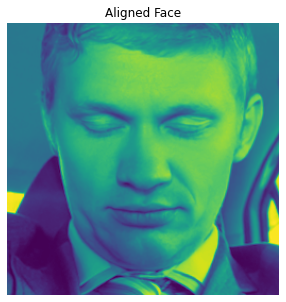

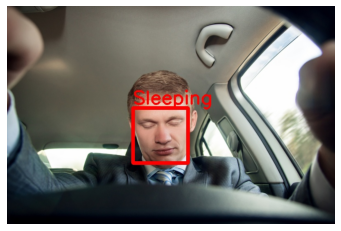

In [37]:
figure = plt.figure(figsize=(5, 5))
predicted_image = cv2.imread(full_face_detection_pipeline('desktop/prooo/sleepy-driver.jpg'))
predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)
plt.imshow(predicted_image)
plt.axis('off')
plt.show()